# Preprocessing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data = pd.read_excel (r'Indian Liver Patient Dataset (ILPD).xlsx', sheet_name='ILPD')
data.head()

NameError: name 'pd' is not defined

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [65]:
data = data.replace(' ?', np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         284 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        284 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    293 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [66]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,38.086667,193268.140000,10.213333,724.403333,103.700000,40.293333
std,13.405403,114198.739612,2.686736,3086.745571,427.589084,11.771257
min,17.000000,21174.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,116935.750000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,183545.500000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,245594.750000,13.000000,0.000000,0.000000,42.000000
max,90.000000,860348.000000,16.000000,34095.000000,2206.000000,98.000000


## Missing Value

In [12]:
np.sum(data.isnull())

age                0
workclass         16
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        16
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     7
type               0
dtype: int64

In [13]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
Y = ['type']
X_int = ['age', 'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
X_cat = ['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']

In [15]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

In [18]:
data_Y['type'].value_counts()

 <=50K    228
 >50K      72
Name: type, dtype: int64

In [28]:
print(data_Y['type'].unique())

[' <=50K' ' >50K']


## Imputation Missing Value

In [69]:
data_cat_array = []
for type_name in data_Y['type'].unique():
    data_cat_1 = data_cat[data_Y['type']==type_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [70]:
data_cat_clean = pd.concat(data_cat_array)
data_cat_clean.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [71]:
np.sum(data_cat_clean.isnull())

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [72]:
data_cat_clean.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [73]:
data_clean = pd.concat([data_int,data_cat_clean,data_Y],axis=1)
data_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,39.0,77516.0,13.0,2174.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,83311.0,13.0,0.0,0.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


## Standardize

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
data_clean['fnlwgt'] = StandardScaler().fit(data_clean[['fnlwgt']]).transform(data_clean[['fnlwgt']])
data_clean['education-num'] = StandardScaler().fit(data_clean[['education-num']]).transform(data_clean[['education-num']])
data_clean['capital-gain'] = StandardScaler().fit(data_clean[['capital-gain']]).transform(data_clean[['capital-gain']])
data_clean['capital-loss'] = StandardScaler().fit(data_clean[['capital-loss']]).transform(data_clean[['capital-loss']])
data_clean['hours-per-week'] = StandardScaler().fit(data_clean[['hours-per-week']]).transform(data_clean[['hours-per-week']])
data_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,39.0,-1.015296,1.038927,0.470404,-0.242928,-0.024961,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,-0.964467,1.038927,-0.235074,-0.242928,-2.322516,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,0.196283,-0.452356,-0.235074,-0.242928,-0.024961,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,0.363595,-1.197997,-0.235074,-0.242928,-0.024961,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,1.273073,1.038927,-0.235074,-0.242928,-0.024961,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


## Encode Label

In [76]:
from sklearn.preprocessing import LabelEncoder
data_clean['workclass'] = LabelEncoder().fit_transform(data_clean['workclass'])
data_clean['education'] = LabelEncoder().fit_transform(data_clean['education'])
data_clean['marital-status'] = LabelEncoder().fit_transform(data_clean['marital-status'])
data_clean['occupation'] = LabelEncoder().fit_transform(data_clean['occupation'])
data_clean['relationship'] = LabelEncoder().fit_transform(data_clean['relationship'])
data_clean['race'] = LabelEncoder().fit_transform(data_clean['race'])
data_clean['sex'] = LabelEncoder().fit_transform(data_clean['sex'])
data_clean['native-country'] = LabelEncoder().fit_transform(data_clean['native-country'])
data_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,39.0,-1.015296,1.038927,0.470404,-0.242928,-0.024961,5,8,4,0,1,4,1,19,<=50K
1,50.0,-0.964467,1.038927,-0.235074,-0.242928,-2.322516,4,8,2,2,0,4,1,19,<=50K
2,38.0,0.196283,-0.452356,-0.235074,-0.242928,-0.024961,2,10,0,4,1,4,1,19,<=50K
3,53.0,0.363595,-1.197997,-0.235074,-0.242928,-0.024961,2,1,2,4,0,2,1,19,<=50K
4,28.0,1.273073,1.038927,-0.235074,-0.242928,-0.024961,2,8,2,7,5,2,0,2,<=50K


## Deteksi Outlier

In [77]:
### for detect outlier
data_int_new = data_clean[X_int].astype(float)
data_num_w_type = pd.concat([data_int_new, data_Y], axis=1)

In [78]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

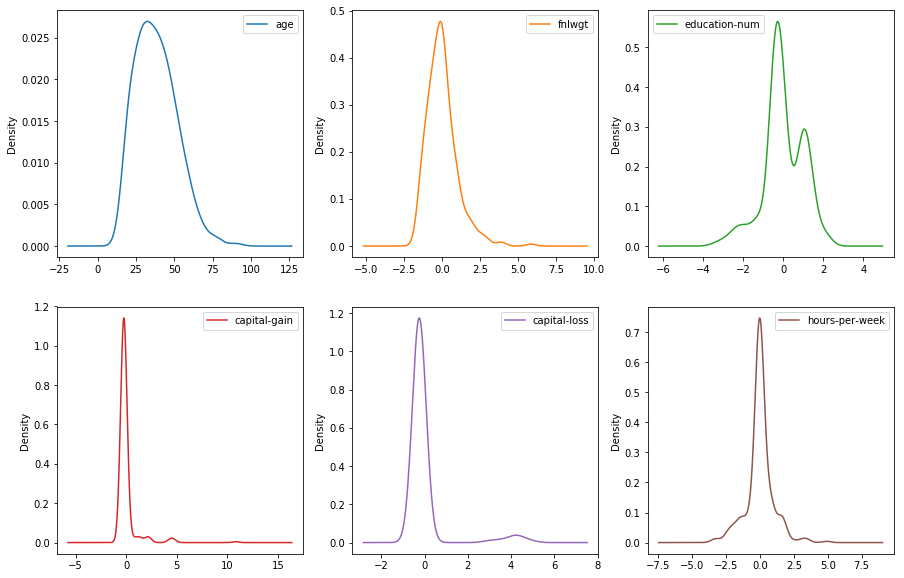

In [79]:
# Univariate Density Plots
data_num_w_type.plot(kind= 'density ' , subplots=True, layout=(2,3), sharex=False)
plt.show()

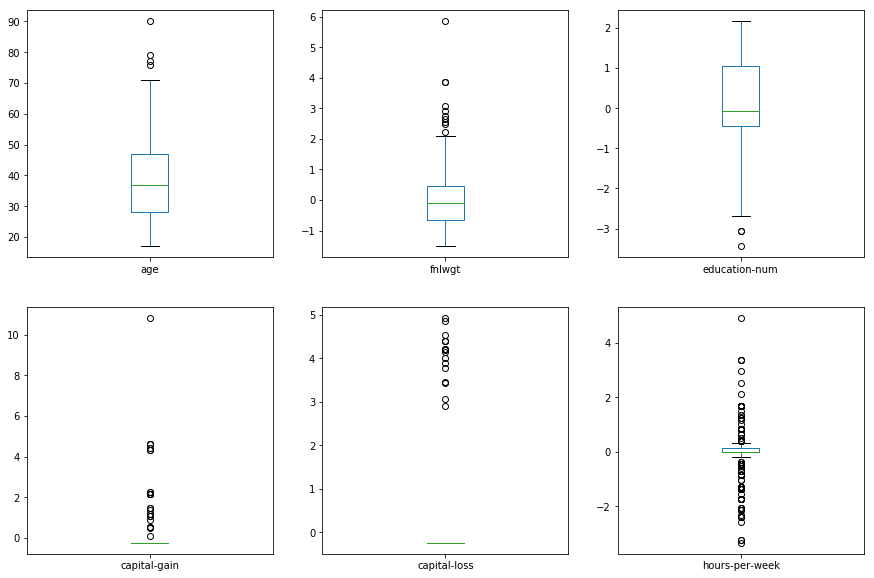

In [80]:
data_num_w_type.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

In [51]:
colors_palette = {" <=50K": "red",  " >50K": "blue"}
colors = [colors_palette[c] for c in data_num_w_type['type']]

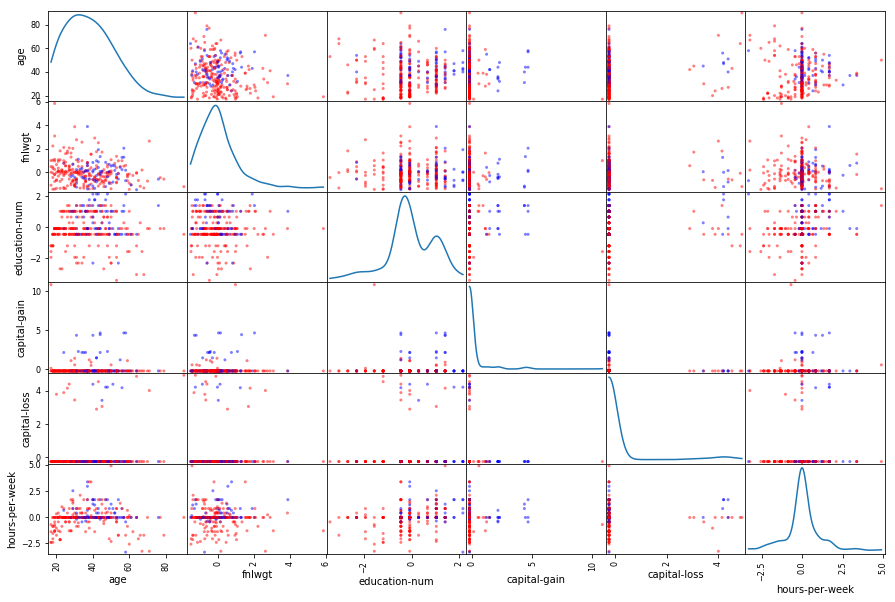

In [81]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_type, color=colors, diagonal='kde')
plt.show()

# Save Data Cleaned

In [82]:
data_clean = data_clean[data.columns]
data_clean.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,39.0,5,-1.015296,8,1.038927,4,0,1,4,1,0.470404,-0.242928,-0.024961,19,<=50K
1,50.0,4,-0.964467,8,1.038927,2,2,0,4,1,-0.235074,-0.242928,-2.322516,19,<=50K
2,38.0,2,0.196283,10,-0.452356,0,4,1,4,1,-0.235074,-0.242928,-0.024961,19,<=50K
3,53.0,2,0.363595,1,-1.197997,2,4,0,2,1,-0.235074,-0.242928,-0.024961,19,<=50K
4,28.0,2,1.273073,8,1.038927,2,7,5,2,0,-0.235074,-0.242928,-0.024961,2,<=50K


In [83]:
data_clean.to_csv('data latihan NRP 4_full_cleaned.csv', index=0)